In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.shape

(4177, 9)

In [4]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We have to predict on the basis of age so we introduce new column 'Age' by Adding 1.5 in 'Rings' column. 
Then remove 'Rings' column from dataset.

In [6]:
data['Age']=data['Rings']+1.5

In [7]:
data=data.drop('Rings',axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [8]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [9]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

 There is one object data type and we have to convert it into nominal data

In [10]:
enc=OrdinalEncoder()

data['Sex']=enc.fit_transform(data['Sex'].values.reshape(-1,1))
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [11]:
data.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

#                                            VISUALISATION

Sex is the nominal data for which we use countplot

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64


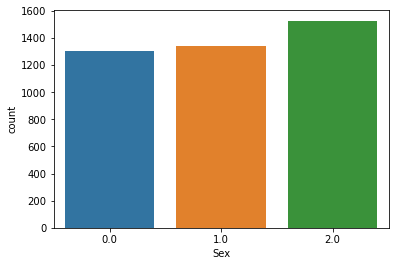

In [12]:
ax= sns.countplot(x='Sex',data=data[['Sex']].copy())
print(data['Sex'].value_counts())

Representation of Sex:
   
       0 : Female
       1 : Infant
       2 : Male 

Continuous data are: 
   Length
   Diameter
   Height
   Whole weight
   Shucked weight
   Viscera weight
   Shell weight
   Age

For continuous data we use distplot

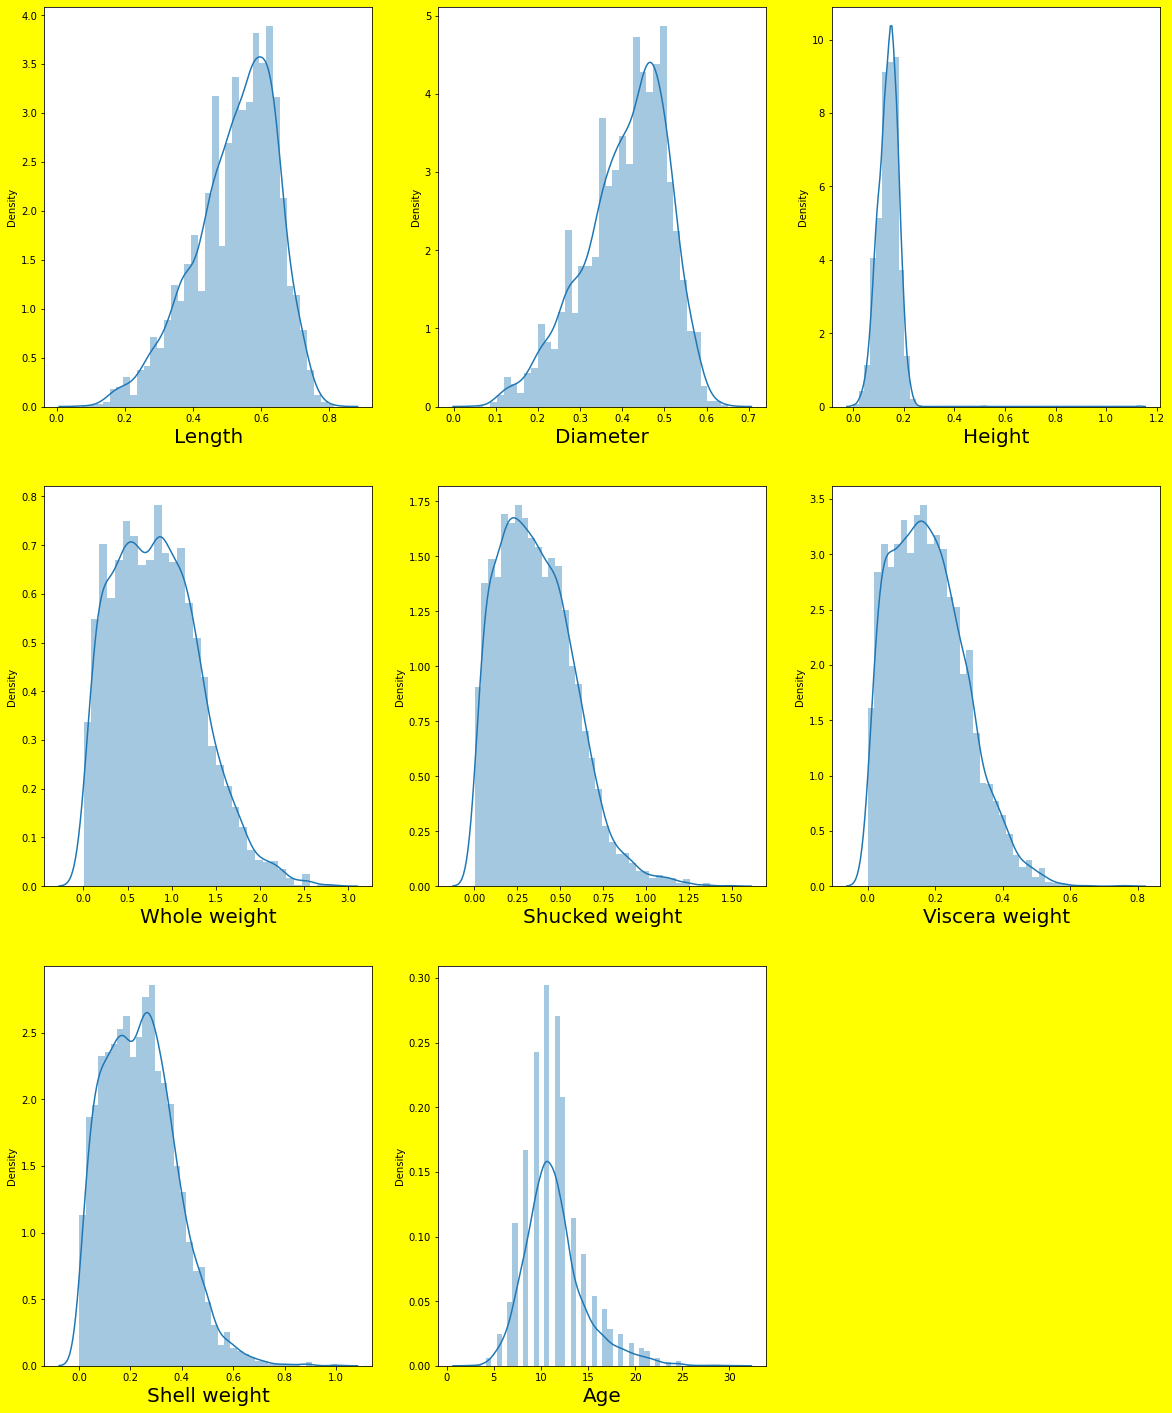

In [13]:
df=data.drop(columns=['Sex'])

plt.figure(figsize=(20,25),facecolor = 'yellow')
plotnumber =1

for column in df:
    if plotnumber <=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

In [14]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


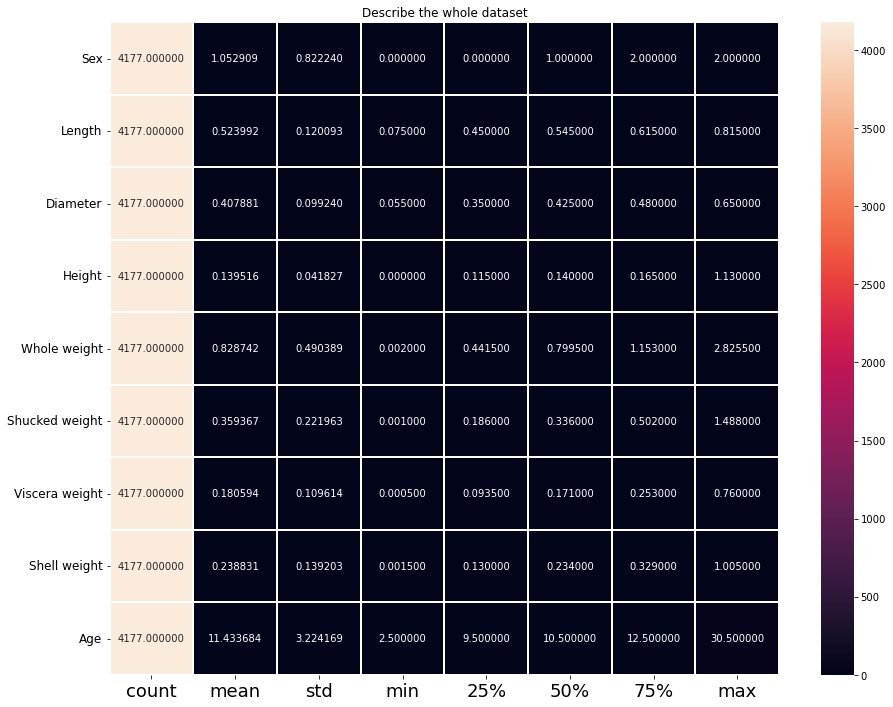

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

The Description od the data set

There are 4177 rows and 9 columns.

The mean, std, minimum and maximum values are:
    
    Sex:
        mean: 1.052909
        std:  0.822240
        minimum: 0.000000
        maximum: 2.000000   
        
    Length:
        mean: 0.523992
        std:  0.120093
        minimum: 0.075000
        maximum: 0.815000
        
    Diameter:
        mean: 0.407881
        std:  0.099240
        minimum: 0.055000
        maximum: 0.650000
        
    Height:
        mean: 0.139516
        std:  0.041827
        minimum: 0.000000
        maximum: 1.130000
        
    Whole weight:
        mean: 0.828742
        std:  0.490389
        minimum: 0.002000
        maximum: 2.825500
        
    Shucked weight:
        mean: 0.359367
        std: 0.221963
        minimum: 0.001000
        maximum: 1.488000
        
    Viscera weight:
        mean: 0.180594
        std:  0.109614
        minimum: 0.000500
        maximum: 0.760000
        
    Shell weight:
        mean: 0.238831
        std:  0.139203
        minimum: 0.001500
        maximum: 1.005000
    

In [16]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

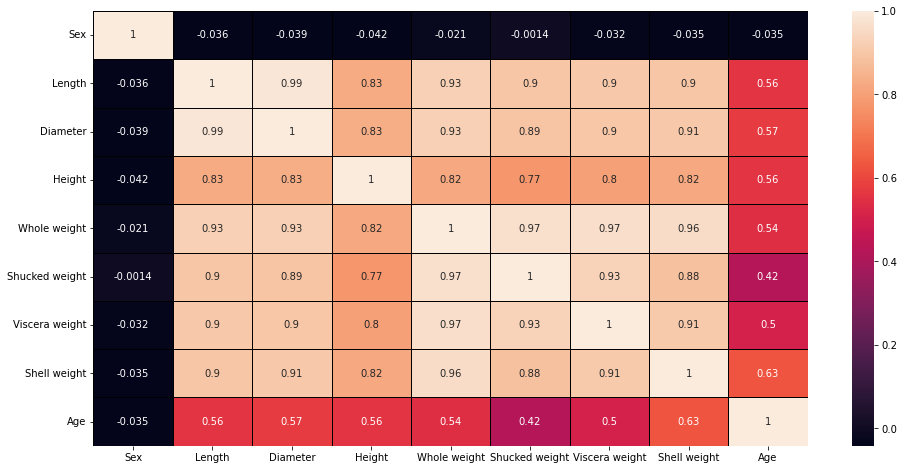

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

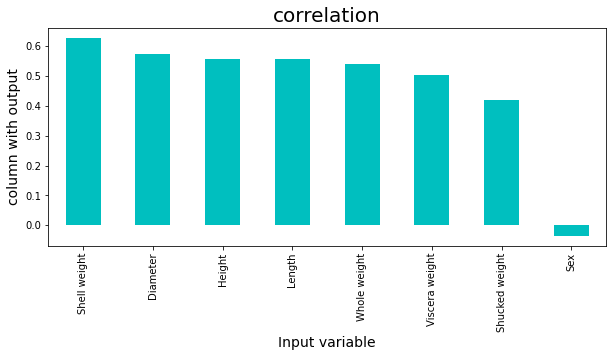

In [18]:
plt.figure(figsize=(10,4))
data.corr()['Age'].sort_values(ascending=False).drop(['Age']).plot(kind='bar',color='c')
plt.xlabel('Input variable',fontsize=14)
plt.ylabel('column with output',fontsize=14)
plt.title("correlation",fontsize=20)
plt.show()

Sex is only negatively correlated with target variable. Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
and Sex are positively correlated.

The corrleation of feature variable to the target variable is:

    Sex has 3% correlation with the target variable which is consider as week bond.
    Length has 56% 
    Diameter has 57%
    Height has 56% 
    Whole weight has 54%
    Shucked weight has 42%
    Viscera weight has 50%
    Shell weight has 63%

In [ ]:
Check Skewness/outlier only on continuous data but not on categorical data and target variable

In [ ]:
Check the outliers

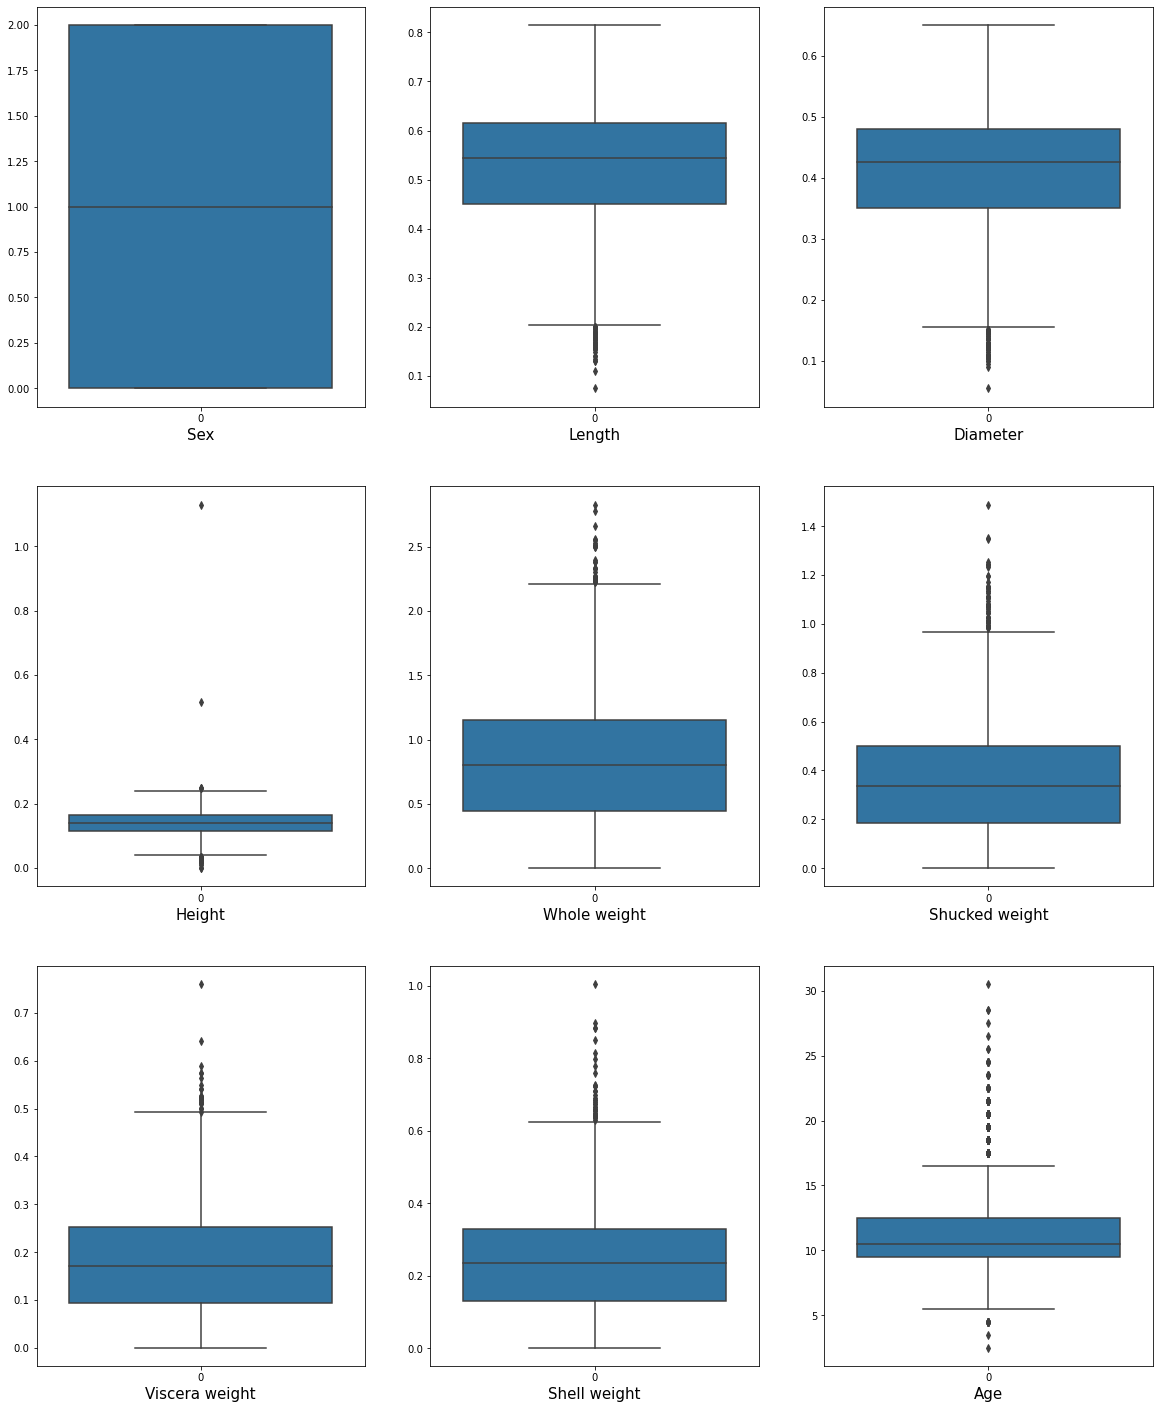

In [19]:
plt.figure(figsize=(20,25))
number = 1

for column in data:
    if number <=9:
        plt.subplot(3,3,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()   

Outliers are present in the columns:

Upward outliers are presnt in the columns:
    Height (two but in large deviation)
    Whole weight
    Shucked weight
    Viscera weight
    shell weight
Downward outliers are present in the columns:
    Length
    Diameter
    Height

In [20]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

In [ ]:
Take threshold value for skewness in range(-0.5,0.5)

    Diameter
    Height
    Whole weight
    Shucked weight
    Viscera weight    
    Shell weight   

In [21]:
# input variables
x=data.drop(['Age'],axis=1)

# output variable
y=data['Age']

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [23]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.010580,Sex
1,40.771963,Length
2,41.858341,Diameter
3,3.560886,Height
4,109.593589,Whole weight
5,28.434776,Shucked weight
6,17.367103,Viscera weight
7,21.258423,Shell weight


Almost all the column have vif greater than 5 so, we remove one column(ie, Whole weight) at a time whom have highest vif value.

In [24]:
data_new=data.drop('Whole weight',axis=1)

In [25]:
x=data_new.drop(['Age'],axis=1)
y=data_new['Age']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.010572,Sex
1,40.764111,Length
2,41.832745,Diameter
3,3.559397,Height
4,8.926868,Shucked weight
5,10.720717,Viscera weight
6,7.818251,Shell weight


Now remove diameter from data_new set

In [26]:
data_new=data_new.drop('Diameter',axis=1)

In [27]:
x=data_new.drop(['Age'],axis=1)
y=data_new['Age']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.010258,Sex
1,8.021671,Length
2,3.511191,Height
3,8.926406,Shucked weight
4,10.712981,Viscera weight
5,7.458796,Shell weight


Now remove Viscera weight for data_new set

In [28]:
data_new=data_new.drop('Viscera weight',axis=1)
data_new.head()

,Sex,Length,Height,Shucked weight,Shell weight,Age
0,2.0,0.455,0.095,0.2245,0.150,16.5
1,2.0,0.350,0.090,0.0995,0.070,8.5
2,0.0,0.530,0.135,0.2565,0.210,10.5
3,2.0,0.440,0.125,0.2155,0.155,11.5
4,1.0,0.330,0.080,0.0895,0.055,8.5


In [29]:
x=data_new.drop(['Age'],axis=1)
y=data_new['Age']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.008138,Sex
1,7.759343,Length
2,3.491234,Height
3,6.153591,Shucked weight
4,6.604550,Shell weight


In [ ]:
Now remove Length from data_new set

In [30]:
data_new=data_new.drop('Length',axis=1)

In [31]:
x=data_new.drop(['Age'],axis=1)
y=data_new['Age']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.006511,Sex
1,3.139339,Height
2,4.731688,Shucked weight
3,5.679316,Shell weight


We get the value of VIF greater than 5 so we remove column iteratively but stil give value greater than 5.
Now we take the whole data

In [32]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Remove outliers using zscore technique

In [33]:
x=data.drop(['Age'],axis=1)
y=data['Age']

In [34]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([  81,  129,  163,  164,  165,  165,  165,  166,  168,  170,  236,
        236,  236,  237,  237,  238,  238,  239,  277,  334,  358,  358,
        526,  526,  694,  696,  696,  719,  719,  720,  720,  891,  891,
        891, 1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206,
       1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418,
       1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756,
       1757, 1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1982,
       1986, 1987, 1987, 2051, 2090, 2108, 2114, 2114, 2157, 2161, 2208,
       2274, 2334, 2334, 2368, 2381, 2544, 2623, 2624, 2624, 2624, 2625,
       2709, 2710, 2710, 2810, 2810, 2811, 2811, 2811, 2862, 2863, 2863,
       2863, 3007, 3008, 3148, 3149, 3151, 3188, 3427, 3427, 3427, 3599,
       3599, 3628, 3713, 3715, 3715, 3715, 3715, 3800, 3837, 3899, 3899,
       3902, 3961, 3962, 3996, 4145, 4148], dtype=int64), array([7, 7, 7, 7, 4, 5, 7, 7, 7, 6, 1, 2, 3, 1, 2, 1, 2, 1, 7, 7

In [35]:
data_new=data[(z<3).all(axis=1)]

In [36]:
print("Old data frame:",data.shape)
print("New data frame:",data_new.shape)
print("Total dropped rows:",data.shape[0]-data_new.shape[0])

Old data frame: (4177, 9)
New data frame: (4084, 9)
Total dropped rows: 93


In [37]:
loss_percentage=(4177-4084)/4177*100
print(loss_percentage,'%')

2.2264783337323437 %


There is not much loss on removing an outliers so we remove them

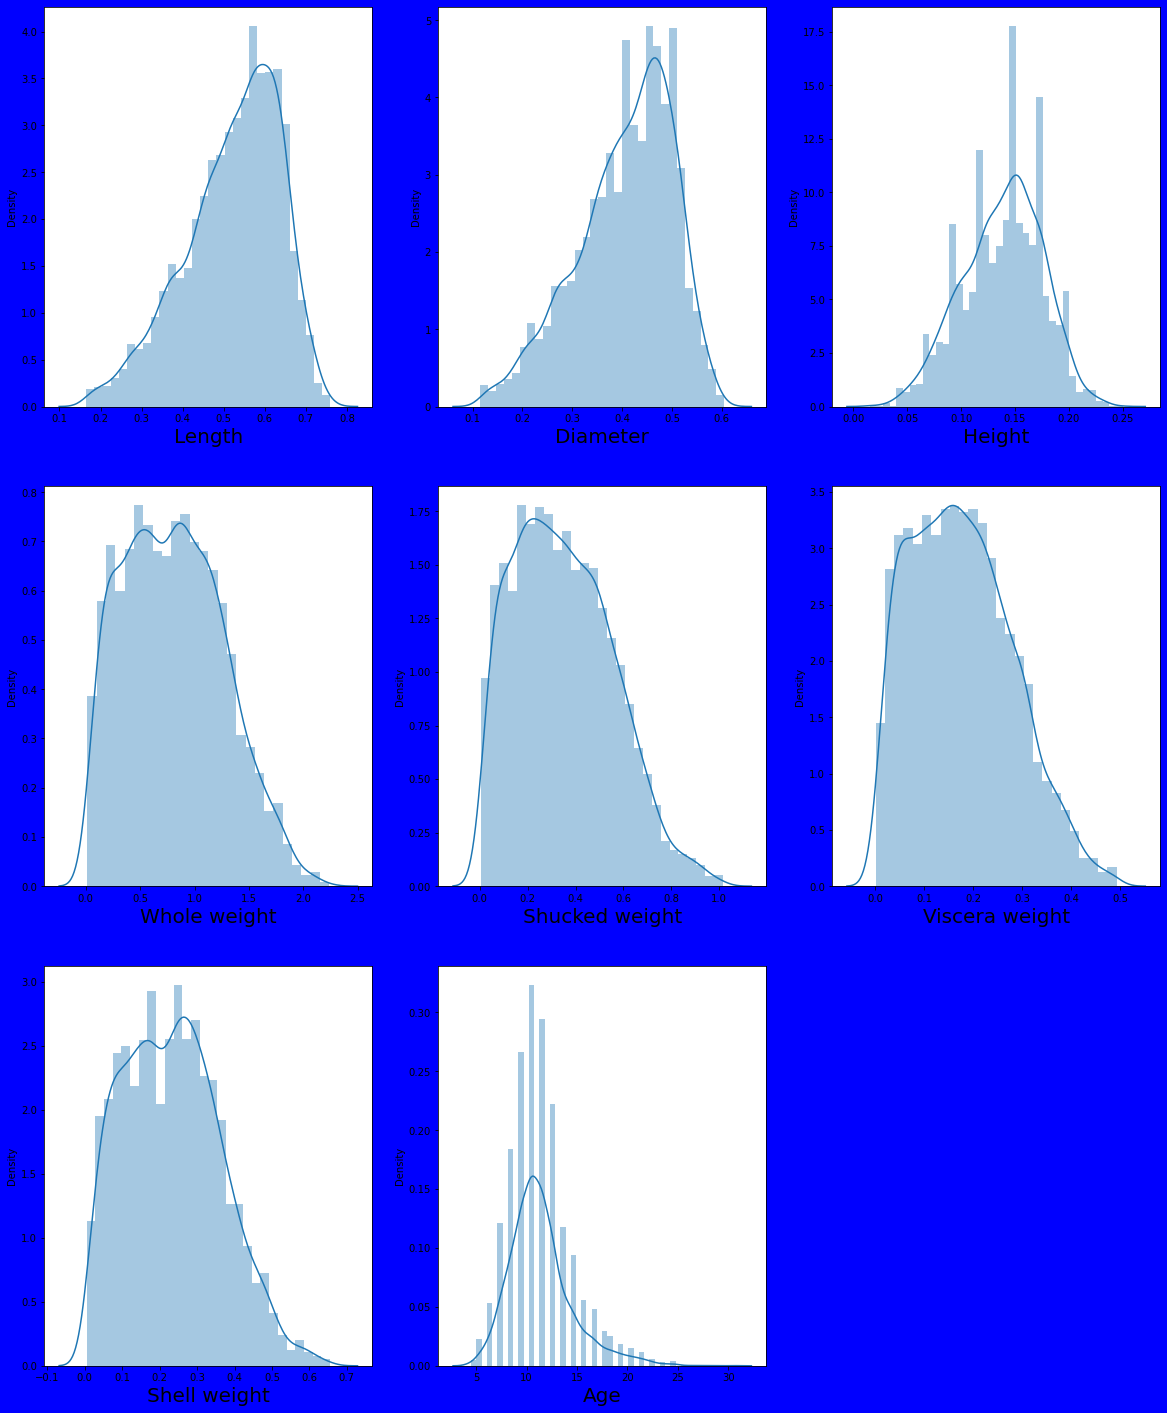

In [38]:
df=data_new.drop(columns=['Sex'])

plt.figure(figsize=(20,25),facecolor = 'blue')
plotnumber =1

for column in df:
    if plotnumber <=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

In [ ]:
Now the data set is better than previous data set. Beacause height have two outlies at large gap after removing it ghraph 
comes into normaly distributed

In [39]:
data_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [40]:
data_new.shape

(4084, 9)

#                                           Model Testing

In [41]:
# input variables
x=data_new.drop(['Age'],axis=1)

# output variable
y=data_new['Age']

In [42]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                                          Linear Regression

In [67]:
lr=LinearRegression()

In [68]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("The model perform very well")
        print("random state",i)
        print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
        print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
        print('\n')

The model perform very well
random state 24
Training accuracy score: 52.4
Testing accuracy score: 52.4


The model perform very well
random state 275
Training accuracy score: 52.5
Testing accuracy score: 52.5


The model perform very well
random state 297
Training accuracy score: 52.5
Testing accuracy score: 52.5


The model perform very well
random state 311
Training accuracy score: 52.5
Testing accuracy score: 52.5


The model perform very well
random state 366
Training accuracy score: 52.5
Testing accuracy score: 52.5


The model perform very well
random state 430
Training accuracy score: 52.4
Testing accuracy score: 52.4


The model perform very well
random state 482
Training accuracy score: 52.5
Testing accuracy score: 52.5


The model perform very well
random state 508
Training accuracy score: 52.5
Testing accuracy score: 52.5


The model perform very well
random state 547
Training accuracy score: 52.5
Testing accuracy score: 52.5


The model perform very well
random state 562
Tr

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =973)

In [70]:
pred_test=lr.predict(x_test)

accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 52.66853068576136


In [71]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 51.87016275534128


At cross fold 3 the cv score is 49.4109742147005


At cross fold 4 the cv score is 40.5983962731066


At cross fold 5 the cv score is 39.23068500495224


At cross fold 6 the cv score is 40.281564430874276


At cross fold 7 the cv score is 42.887901813681076


At cross fold 8 the cv score is 36.10612957679924


At cross fold 9 the cv score is 40.29457027984499




In [72]:
lrscore=cross_val_score(lr,x_scaled,y,cv=2)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 51.87016275534128


In [73]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 1.5883452708199273
Mean square error: 4.624988309866042
Root mean square error: 2.150578598858001


                                     Decission Tree Regressor

In [51]:
dtr=DecisionTreeRegressor()

In [52]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [54]:
pred_test=dtr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

dtrscore=cross_val_score(dtr,x_scaled,y,cv=2)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

R square score for testing 20.94752512894106
cross val score: 6.223491080026239


In [55]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 1.981640146878825
Mean square error: 7.724602203182375
Root mean square error: 2.779316859082889


                              Random Forest Regressor

In [56]:
rfr=RandomForestRegressor()

In [57]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [58]:
pred_test=rfr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

rfrscore=cross_val_score(rfr,x_scaled,y,cv=2)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

R square score for testing 55.3573989583525
cross val score: 52.09791820088287


In [59]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 1.482949816401469
Mean square error: 4.3622458996328035
Root mean square error: 2.088599027968941


                                 AdaBoostRegressor

In [60]:
ada= AdaBoostRegressor()

In [61]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [62]:
pred_test=ada.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

adascore=cross_val_score(ada,x_scaled,y,cv=2)
adac=adascore.mean()
print('cross val score:',adac*100)

R square score for testing 22.71033192770825
cross val score: 30.697165679360804


In [63]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 2.3650551638371686
Mean square error: 7.552349768280718
Root mean square error: 2.748153883660942


In [ ]:
                                Gradient Boosting Regressor

In [64]:
gb= GradientBoostingRegressor()

In [65]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [66]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

gbscore=cross_val_score(gb,x,y,cv=2)
gbc=adascore.mean()
print('cross val score:',gbc*100)

R square score 55.60364946467824
cross val score: 30.697165679360804


In [ ]:
The value of r2 score and cv for the 5 machine learning model are:
    
Linear Regression
     r2_score: 52.66
        cv   : 51.87
            
Decission Tree Regressor
     r2_score: 20.94
        cv   : 6.22
            
Random Forest Regressor
     r2_score: 55.35
        cv   : 51.07
            
AdaBoostRegressor
     r2_score: 22.71
        cv   : 30.69
            
Gradient Boosting Regressor
     r2_score: 55.60
        cv   : 30.69
            
Linear regression and Random forest regressor gives better r2_score and cross validation score. But Linear regression has least
differnce,so we select it.

#                                          MODELING OF LINEAR REGRESSION

In [ ]:
                                        Regularization

In [74]:
from sklearn.linear_model import Lasso

In [75]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [76]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss = r2_score(y_test,pred_ls)*100
print("r2_score",lss)

cv_score=cross_val_score(ls,x_scaled,y,cv=2)
cv_mean=cv_score.mean()*100
print("cv_score",cv_mean)

r2_score 52.533416421474534
cv_score 51.8721063875724


Predicted value of R2_score of linear regression is 52.66% and after regularization we get 52.53% which is little difference.
But the cv_score of both the time are same which is 51.87%

                      Plot a graph b/w actual and predicted value

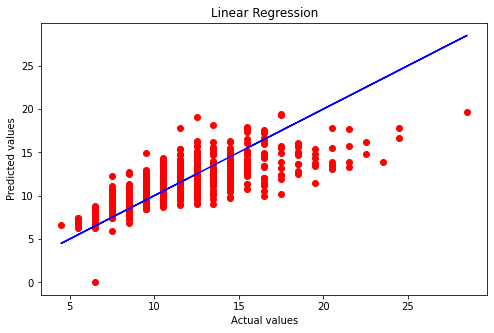

In [78]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')                                                                                
plt.show()

In [ ]:
Accuracy score for our model is 52%

In [83]:
filename='age.pkl'
pickle.dump(lr,open(filename,'wb'))

In [85]:
loaded_model=pickle.load(open('age.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.5266853068576136


                                   Conclusion

In [89]:
Prediction=pd.DataFrame([loaded_model.predict(x_test)[:],pred_ls[:]],index=["Predicted value","Actual value"])
Prediction

,0,1,2,3,4,5,6,7,8,9,...,807,808,809,810,811,812,813,814,815,816
Predicted value,10.520813,11.160223,11.837367,11.890728,12.349134,11.696691,15.418869,13.706887,8.678543,14.067285,...,12.009072,13.693289,12.221222,9.572840,10.078242,9.621570,11.816224,11.181403,9.405821,13.771635
Actual value,10.493842,11.178456,11.923547,11.930913,12.488312,11.588321,15.392251,13.695385,8.661748,13.977451,...,11.965550,13.647145,12.183471,9.486852,10.099603,9.623179,11.780549,11.194982,9.372245,13.694491
